In [1]:
import torch
import sys
import os

In [2]:
# sys.path.append(os.getcwd())

# try:
#     from models.swin_transformer import SwinTransformer
# except ImportError:
#     print("Error: Could not import SwinTransformer.")
#     print("Make sure you are running this script from the 'Swin-Transformer' root folder.")
#     sys.exit(1)

# # 1. Setup Device (MPS for Mac)
# # We use a try-except block because some older PyTorch versions on Mac might be fussy
# try:
#     if torch.backends.mps.is_available():
#         device = torch.device("mps")
#     else:
#         device = torch.device("cpu")
# except AttributeError:
#     device = torch.device("cpu")

# print(f"Running on: {device}")  # <--- This was the line with the error

In [3]:
# # 2. Define the Model (Swin-Tiny)
# model = SwinTransformer(
#     img_size=224,
#     patch_size=4,
#     in_chans=3,
#     num_classes=1000,
#     embed_dim=96,
#     depths=[2, 2, 6, 2],
#     num_heads=[3, 6, 12, 24],
#     window_size=7
# )

# # 3. Move model to GPU
# model.to(device)
# model.eval()

# # 4. Create a dummy image (Batch size 1, 3 channels, 224x224)
# dummy_input = torch.randn(1, 3, 224, 224).to(device)

# # 5. Run Inference
# try:
#     with torch.no_grad():
#         output = model(dummy_input)
#     print(f"Output shape: {output.shape}")
#     print("Success! The Swin Transformer is running on your Mac.")
#     print(output)
# except Exception as e:
#     print(f"An error occurred during inference: {e}")

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Definiamo le classi (assicurati che l'ordine sia lo stesso dello script: Alfabetico)
classes = ['NORMAL', 'PNEUMONIA']

# Carichiamo i dati salvati dallo script
preds = np.load('results_preds.npy')
targets = np.load('results_targets.npy')

print(f"Dati caricati! Totale immagini analizzate: {len(preds)}")

Dati caricati! Totale immagini analizzate: 16


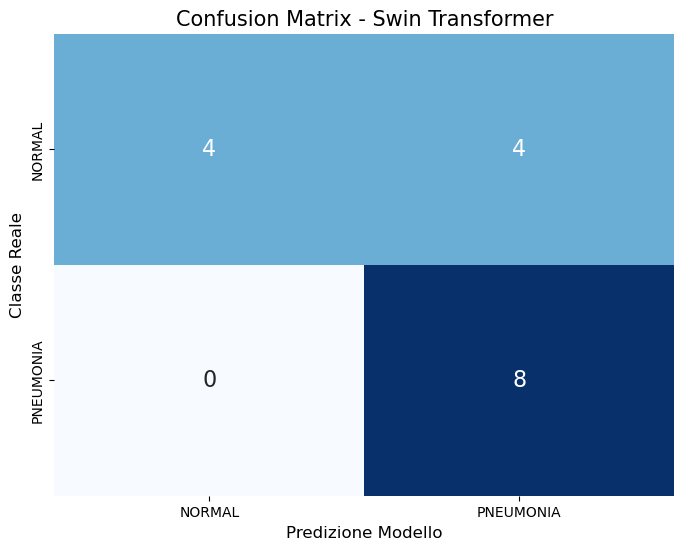

In [5]:
# Calcolo della matrice
cm = confusion_matrix(targets, preds)

# Plot con Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=classes, yticklabels=classes, annot_kws={"size": 16})

plt.xlabel('Predizione Modello', fontsize=12)
plt.ylabel('Classe Reale', fontsize=12)
plt.title('Confusion Matrix - Swin Transformer', fontsize=15)
plt.show()

In [6]:
print("Report di Classificazione:")
print(classification_report(targets, preds, target_names=classes))

# Calcolo percentuali specifiche
tn, fp, fn, tp = cm.ravel()
accuracy = (tp + tn) / (tp + tn + fp + fn)
sensitivity = tp / (tp + fn) # Recall per Pneumonia (Quanto bravo è a trovare i malati)
specificity = tn / (tn + fp) # Recall per Normal (Quanto bravo è a non allarmare i sani)

print(f"Accuracy Totale: {accuracy:.2%}")
print(f"Sensitivity (Recall Polmonite): {sensitivity:.2%} <--- Importante in medicina!")
print(f"Specificity (Recall Normal): {specificity:.2%}")

Report di Classificazione:
              precision    recall  f1-score   support

      NORMAL       1.00      0.50      0.67         8
   PNEUMONIA       0.67      1.00      0.80         8

    accuracy                           0.75        16
   macro avg       0.83      0.75      0.73        16
weighted avg       0.83      0.75      0.73        16

Accuracy Totale: 75.00%
Sensitivity (Recall Polmonite): 100.00% <--- Importante in medicina!
Specificity (Recall Normal): 50.00%


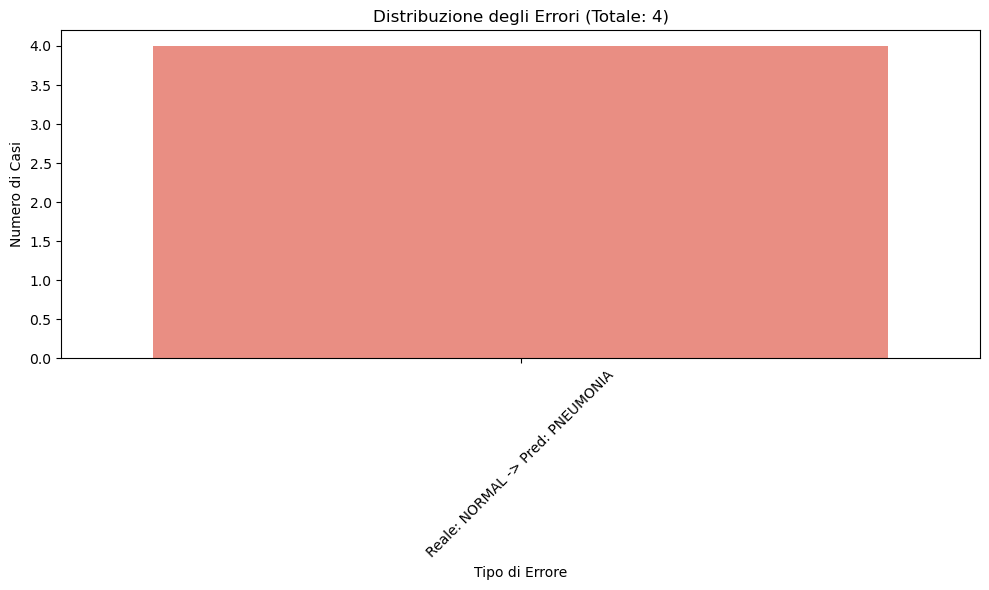

In [11]:
# Grafico a barre degli errori
errors = np.where(preds != targets)[0]
error_types = []

for i in errors:
    true_label = classes[targets[i]]
    pred_label = classes[preds[i]]
    error_types.append(f"Reale: {true_label} -> Pred: {pred_label}")

plt.figure(figsize=(10, 6))

# Usa 'x' invece di 'y' per le barre verticali
# Usa 'color' invece di 'palette' per evitare l'errore precedente
sns.countplot(x=error_types, color="salmon")

plt.title(f"Distribuzione degli Errori (Totale: {len(errors)})")
plt.xlabel("Tipo di Errore")
plt.ylabel("Numero di Casi")

# Rotazione delle etichette a 45 gradi per leggerle bene
plt.xticks(rotation=45) 

plt.tight_layout() # Aggiusta i margini automaticamente
plt.show()